In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 
# 将numpy版本控制到1.16.2 数 num_words=10000 的意思是仅保留训练数据中前 10 000 个最常出现的单词。低频单
# 词将被舍弃。这样得到的向量数据不会太大

Using TensorFlow backend.


In [12]:
"""
 原始数据 
     训练数据和测试数据是数组形式
     标签数据是数组
"""

'\n 原始数据 \n     训练数据和测试数据是数组形式\n     标签数据是数组\n'

### 准备数据 对数据进行张量处理
- 填充列表，使其具有相同的长度，再将列表转换成形状为 (samples, word_indices)
的整数张量，然后网络第一层使用能处理这种整数张量的层（即 Embedding 层，本书
后面会详细介绍）。
- 对列表进行 one-hot 编码，将其转换为 0 和 1 组成的向量。举个例子，序列 [3, 5] 将会
被转换为 10 000 维向量，只有索引为 3 和 5 的元素是 1，其余元素都是 0。然后网络第
一层可以用 Dense 层，它能够处理浮点数向量数据。

In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [3]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train =  np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')
# 以上是将训练数据和标签数据进行向量化
X_train.shape

(25000, 10000)

### 构建网络

In [6]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 编译模型

In [7]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

### 配置优化器


### 验证数据集

In [8]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

W0829 15:43:52.807018 140510505969472 deprecation_wrapper.py:119] From /home/admin/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.5344 - acc: 0.7746 - val_loss: 0.3943 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.3181 - acc: 0.8971 - val_loss: 0.3278 - val_acc: 0.8712
Epoch 3/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.2343 - acc: 0.9245 - val_loss: 0.2862 - val_acc: 0.8881
Epoch 4/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1845 - acc: 0.9400 - val_loss: 0.2745 - val_acc: 0.8907
Epoch 5/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1528 - acc: 0.9512 - val_loss: 0.2991 - val_acc: 0.8805
Epoch 6/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1226 - acc: 0.9627 - val_loss: 0.2885 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1071 - acc: 0.9658 - val_loss: 0.3038 - val_ac

In [10]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

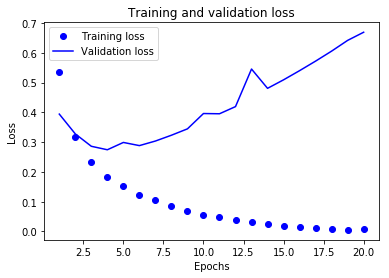

In [43]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

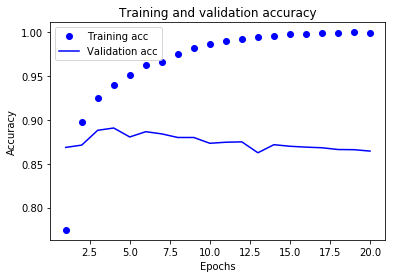

In [12]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 新模型 

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.4750 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.2658 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.1983 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.1678 - acc: 0.9399


In [15]:
results = model.evaluate(X_test, y_test)

25000/25000 [==============================] - 1s 50us/step


In [16]:
results # 损失值和对应精度值

[0.3227926153373718, 0.87356]

In [17]:
model.predict(X_test)

array([[0.1383535 ],
       [0.99970305],
       [0.30286348],
       ...,
       [0.07152042],
       [0.04300845],
       [0.47260392]], dtype=float32)

In [42]:
for layer in model.layers:
    print(layer.output)
for layer in model.layers:
    print(layer.input)

Tensor("dense_7/Relu:0", shape=(?, 16), dtype=float32)
Tensor("dense_8/Relu:0", shape=(?, 16), dtype=float32)
Tensor("dense_9/Sigmoid:0", shape=(?, 1), dtype=float32)
Tensor("dense_7_input:0", shape=(?, 10000), dtype=float32)
Tensor("dense_7/Relu:0", shape=(?, 16), dtype=float32)
Tensor("dense_8/Relu:0", shape=(?, 16), dtype=float32)


In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [37]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.4584 - acc: 0.8133
Epoch 2/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.2630 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.2005 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.1683 - acc: 0.9392


In [38]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
